## 0.0. Instalando e Importando Bibliotecas Necessárias

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 0.1. Carregando os dados

In [22]:
df = pd.read_csv('Advertising Budget and Sales.csv')
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## 1.0. Análise Exploratória dos Dados

### 1.1. Verificar informações gerais do dataframe

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### 1.2. Verificar valores ausentes

In [24]:
df.isnull().sum()

,0
Unnamed: 0,0
TV Ad Budget ($),0
Radio Ad Budget ($),0
Newspaper Ad Budget ($),0
Sales ($),0


### 1.3. Verificar estatísticas descritivas

In [25]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### 1.4. Visualizar a distribuição dos dados

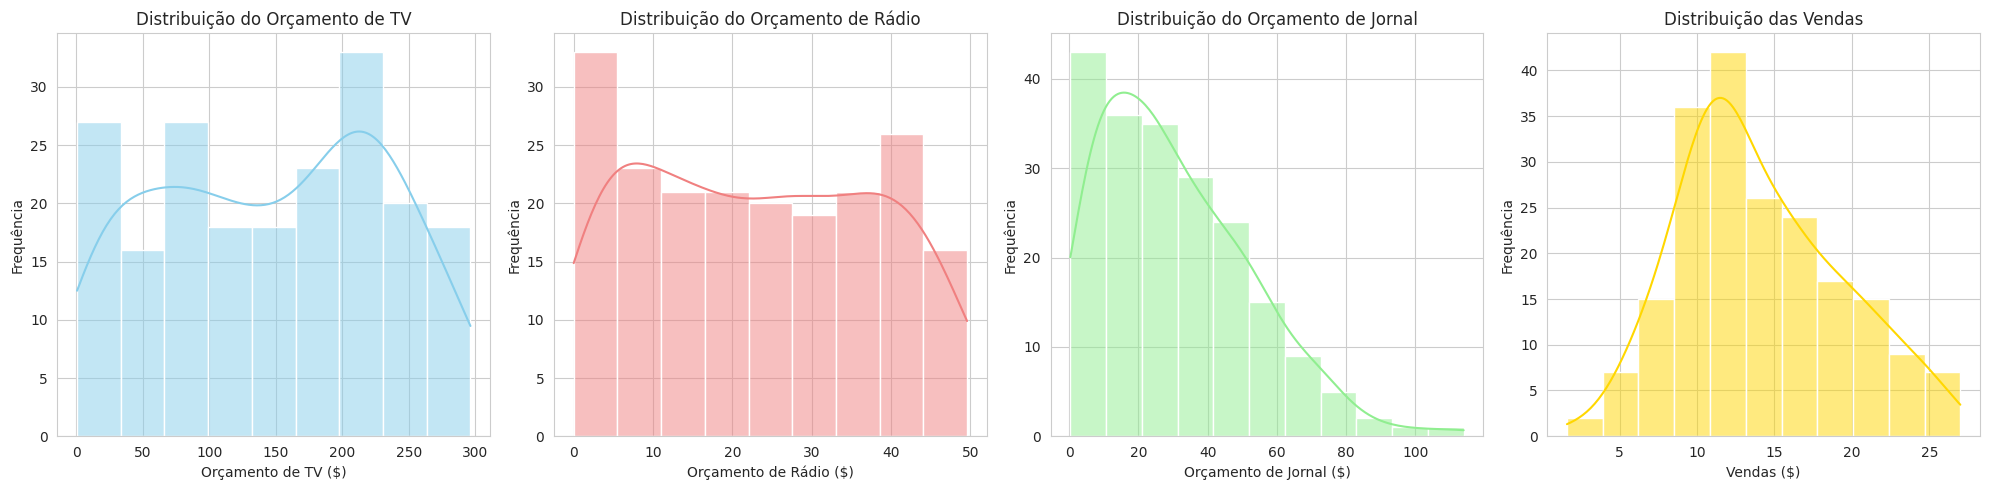

In [26]:
# Configurando o estilo dos gráficos
sns.set_style('whitegrid')

# Distribuição das variáveis de orçamento e vendas
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.histplot(df['TV Ad Budget ($)'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribuição do Orçamento de TV')
axes[0].set_xlabel('Orçamento de TV ($)')
axes[0].set_ylabel('Frequência')

sns.histplot(df['Radio Ad Budget ($)'], kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Distribuição do Orçamento de Rádio')
axes[1].set_xlabel('Orçamento de Rádio ($)')
axes[1].set_ylabel('Frequência')

sns.histplot(df['Newspaper Ad Budget ($)'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribuição do Orçamento de Jornal')
axes[2].set_xlabel('Orçamento de Jornal ($)')
axes[2].set_ylabel('Frequência')

sns.histplot(df['Sales ($)'], kde=True, ax=axes[3], color='gold')
axes[3].set_title('Distribuição das Vendas')
axes[3].set_xlabel('Vendas ($)')
axes[3].set_ylabel('Frequência')


plt.tight_layout()
plt.show()







### 1.5. Relação entre Orçamento de Anúncios e Vendas

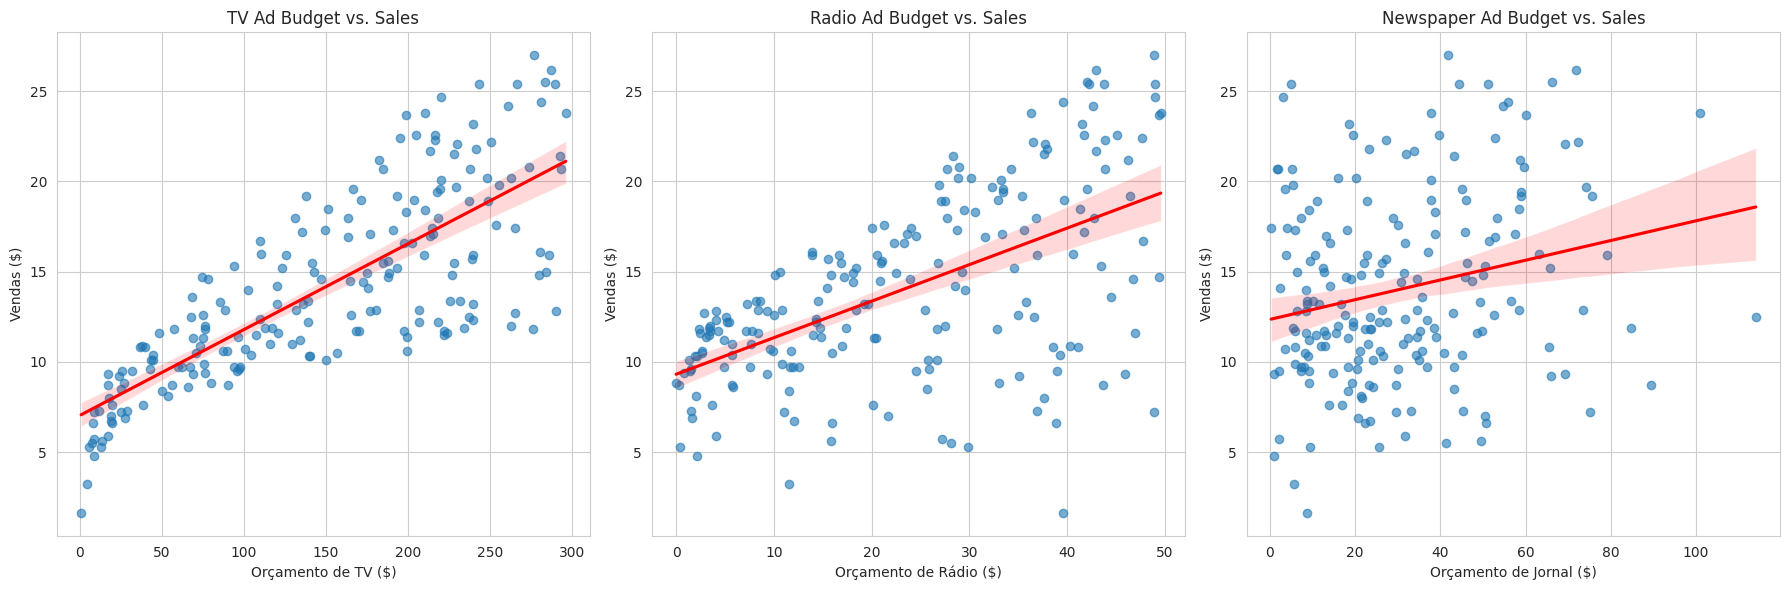

In [27]:
# Gráficos de dispersão para visualizar a relação entre o orçamento de cada canal e as vendas

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.regplot(x='TV Ad Budget ($)', y='Sales ($)', data=df, ax=axes[0], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
axes[0].set_title('TV Ad Budget vs. Sales')
axes[0].set_xlabel('Orçamento de TV ($)')
axes[0].set_ylabel('Vendas ($)')

sns.regplot(x='Radio Ad Budget ($)', y='Sales ($)', data=df, ax=axes[1], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
axes[1].set_title('Radio Ad Budget vs. Sales')
axes[1].set_xlabel('Orçamento de Rádio ($)')
axes[1].set_ylabel('Vendas ($)')

sns.regplot(x='Newspaper Ad Budget ($)', y='Sales ($)', data=df, ax=axes[2], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
axes[2].set_title('Newspaper Ad Budget vs. Sales')
axes[2].set_xlabel('Orçamento de Jornal ($)')
axes[2].set_ylabel('Vendas ($)')

plt.tight_layout()
plt.show()

### 1.6. Análise de Correlação Quantitativa

In [28]:
# Calculando a matriz de correlação para as variáveis de interesse
correlation_matrix = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)', 'Sales ($)']].corr()
display(correlation_matrix)

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
TV Ad Budget ($),1.000000,0.054809,0.056648,0.782224
Radio Ad Budget ($),0.054809,1.000000,0.354104,0.576223
Newspaper Ad Budget ($),0.056648,0.354104,1.000000,0.228299
Sales ($),0.782224,0.576223,0.228299,1.000000


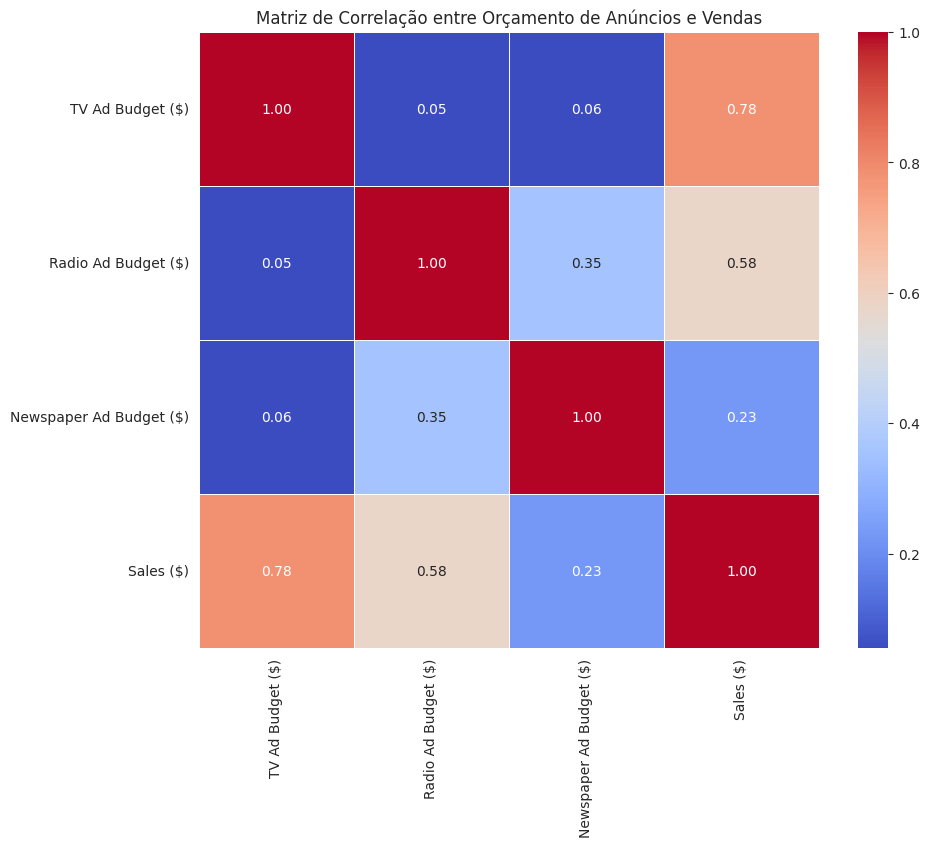

In [29]:
# Criando um mapa de calor para a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação entre Orçamento de Anúncios e Vendas')
plt.show()